## Imports

In [21]:
%load_ext autoreload
%autoreload 2

from utils.StudentLifeDataLoader import StudentLifeDataLoader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
seed = 24091993

In [23]:
# Crear una función para calcular los días hasta la próxima deadline
def days_until_next_deadline(group):
    # Obtener las fechas en las que hay deadlines
    deadline_dates = group[group['deadlines'] == 1.0].index.get_level_values('date')
    
    # Crear una nueva columna para los días hasta la próxima deadline
    group['days_until_next_deadline'] = np.nan
    
    # Iterar sobre cada fila del grupo para calcular el número de días hasta la próxima deadline
    for i, row_date in enumerate(group.index.get_level_values('date')):
        # Buscar la próxima deadline
        future_deadlines = deadline_dates[deadline_dates > row_date]
        if len(future_deadlines) > 0:
            # Si hay una próxima deadline, calcular la diferencia en días
            group.loc[(group.index.get_level_values('date') == row_date), 'days_until_next_deadline'] = (future_deadlines[0] - row_date).days
        else:
            # Si no hay más deadlines futuras, asignar un valor NaN o algún otro indicador
            group.loc[(group.index.get_level_values('date') == row_date), 'days_until_next_deadline'] = np.nan

    return group


# Crear una función para rellenar NaNs por cada user_id
def fill_na_by_user(group):
    # Para columnas numéricas temporales o que dependen del tiempo, podemos usar el método de rellenado hacia adelante o hacia atrás
    return group.ffill().bfill()

## Load all data for visualizing

In [24]:
studentlife = StudentLifeDataLoader('studentlife', filter_weeks=False, filter_weekends=False, level='day')
stress_data = studentlife.get_stress_data()
stress_data

,stress_level,user_id,date
0,3,51,2013-04-03
1,2,51,2013-03-30
2,2,51,2013-04-04
3,2,51,2013-04-05
4,1,51,2013-04-06
...,...,...,...
875,2,32,2013-05-06
876,1,32,2013-05-18
877,2,32,2013-05-22
878,2,32,2013-05-24


<Axes: xlabel='date'>

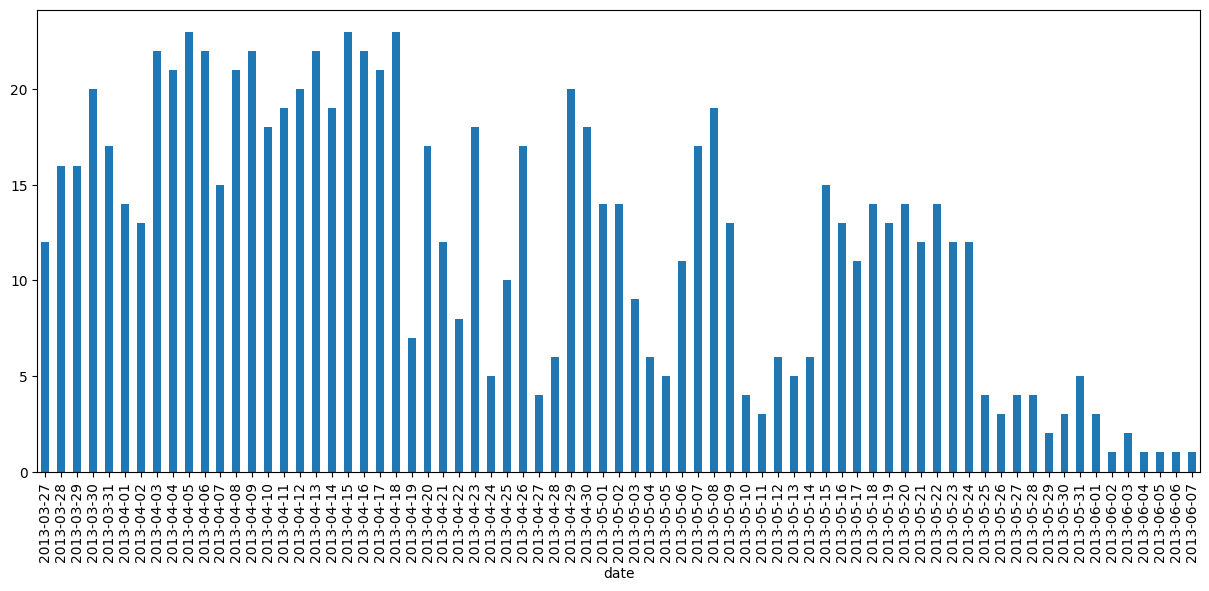

In [25]:
# make figure wider
plt.figure(figsize=(15, 6))
stress_data.groupby(stress_data['date']).size().plot.bar()

In [26]:
stress_data['user_id'].value_counts()

user_id
59    70
19    55
16    54
44    47
57    45
49    44
58    40
10    40
8     39
36    36
32    36
33    35
17    35
43    34
51    32
22    31
52    30
35    29
53    28
4     27
14    27
23    24
24    23
7     19
Name: count, dtype: int64

## Load filtered data

Se eliminan los fines de semana y nos quedamos con las semanas del 27 de Marzo al 27 de Mayo

In [27]:
studentlife = StudentLifeDataLoader('studentlife', filter_weeks=True, filter_weekends=True, level='day')
stress_data = studentlife.get_stress_data(stress_mapping='simple')
stress_data

,stress_level,user_id,date
0,3,51,2013-04-03
1,2,51,2013-04-04
2,2,51,2013-04-05
3,2,51,2013-04-08
4,2,51,2013-04-09
...,...,...,...
643,2,32,2013-05-10
644,2,32,2013-05-06
645,2,32,2013-05-22
646,2,32,2013-05-24


<Axes: xlabel='date'>

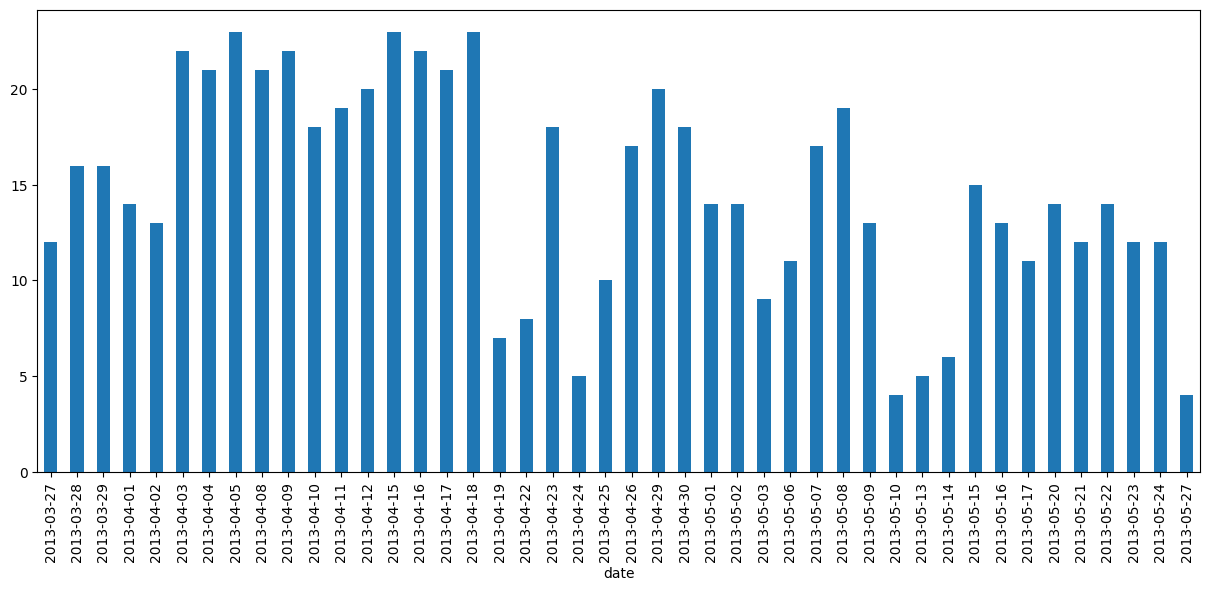

In [28]:
# make figure wider
plt.figure(figsize=(15, 6))
stress_data.groupby(stress_data['date']).size().plot.bar()

In [29]:
stress_data['user_id'].value_counts()

user_id
59    41
19    39
16    38
57    36
44    35
58    32
49    32
43    30
10    30
8     28
36    27
32    27
33    26
51    25
22    23
53    23
14    22
52    22
17    22
4     22
35    20
23    17
24    16
7     15
Name: count, dtype: int64

In [30]:
sleep_data = studentlife.get_sleep_data()
social_data = studentlife.get_social_data()
class_data = studentlife.get_class_data()
conversation_data = studentlife.get_conversation_data()
activity_data = studentlife.get_activity_data()
environmental_data = studentlife.get_weather_data()
deadlines_data = studentlife.get_deadlines_data()
audio_data = studentlife.get_audio_data()


In [31]:
environmental_data

,environmental_temperature_mean,environmental_temperature_max,environmental_temperature_min,environmental_humidity_mean,environmental_humidity_max,environmental_humidity_min,environmental_precipitation,environmental_cloudcover
date,,,,,,,,
2008-01-01,-4.845833,-2.0,-9.3,88.416667,95,82,7.7,82.083333
2008-01-02,-7.183333,-2.6,-15.4,81.500000,96,63,0.3,74.083333
2008-01-03,-18.445833,-15.7,-21.0,70.916667,79,54,0.0,33.958333
2008-01-04,-16.945833,-6.0,-25.0,72.750000,80,61,0.0,42.375000
2008-01-05,-7.408333,-2.2,-12.9,78.166667,86,60,0.0,49.875000
...,...,...,...,...,...,...,...,...
2013-12-27,-5.416667,-1.7,-7.5,78.916667,88,56,0.0,28.666667
2013-12-28,-2.887500,3.5,-8.0,80.791667,89,67,0.0,51.083333
2013-12-29,-0.912500,3.4,-6.5,87.125000,98,74,6.1,52.541667


In [32]:
# Merge: unir los DataFrames basándonos en la columna 'date'
stress_data = pd.merge(stress_data, environmental_data, on='date', how='left')

In [33]:
sleep_data['user_id'].value_counts()

user_id
16    40
57    38
19    37
58    37
44    37
59    34
32    32
10    30
33    28
53    26
49    24
17    24
4     23
8     23
35    21
14    21
36    21
51    21
43    19
52    18
7     17
22    15
23    15
24    11
Name: count, dtype: int64

In [34]:
social_data['user_id'].value_counts()

user_id
44    37
59    33
19    26
16    23
58    23
33    21
51    20
43    20
8     20
36    19
32    19
57    18
49    18
17    17
53    17
23    16
10    16
22    15
14    14
4     14
35    13
7     13
24    12
52     7
Name: count, dtype: int64

In [ ]:
stress_data['date'] = pd.to_datetime(stress_data['date'])
sleep_data['date'] = pd.to_datetime(sleep_data['date'])
social_data['date'] = pd.to_datetime(social_data['date'])
conversation_data['date'] = pd.to_datetime(conversation_data['date'])


KeyError: 'index'

In [36]:
activity_data['date'] = pd.to_datetime(activity_data['date'])
audio_data['date'] = pd.to_datetime(audio_data['date'])
class_data['date'] = pd.to_datetime(class_data['date'])
deadlines_data['date'] = pd.to_datetime(deadlines_data['date'])

In [37]:
stress_data.set_index(['user_id', 'date'], inplace=True)
sleep_data.set_index(['user_id', 'date'], inplace=True)
social_data.set_index(['user_id', 'date'], inplace=True)
conversation_data.set_index(['user_id', 'date'], inplace=True)
activity_data.set_index(['user_id', 'date'], inplace=True)
audio_data.set_index(['user_id', 'date'], inplace=True)
class_data.set_index(['user_id', 'date'], inplace=True)
deadlines_data.set_index(['user_id', 'date'], inplace=True)

In [38]:
audio_data

category            environmental_minutes_silence  \
user_id date                                        
14      2013-03-27                            406   
        2013-03-28                            388   
        2013-03-29                            358   
        2013-04-01                            493   
        2013-04-02                            493   
...                                           ...   
4       2013-05-17                            412   
        2013-05-20                            461   
        2013-05-21                            519   
        2013-05-22                            546   
        2013-05-23                            328   

category            environmental_minutes_voice  environmental_minutes_noise  \
user_id date                                                                   
14      2013-03-27                          148                          191   
        2013-03-28                          334                          275   
        2013-03-29                          352                          326   
        2013-04-01                          381                           84   
        2013-04-02                          273                          154   
...                                         ...                          ...   
4       2013-05-17                          359                          256   
        2013-05-20                          182                          242   
        2013-05-21                          243                          138   
        2013-05-22                          179                          133   
        2013-05-23                           45                           35   

category            environmental_minutes_unknown  
user_id date                                       
14      2013-03-27                              0  
        2013-03-28                              0  
        2013-03-29                              0  
        2013-04-01                              0  
        2013-04-02                              0  
...                                           ...  
4       2013-05-17                              0  
        2013-05-20                              0  
        2013-05-21                              0  
        2013-05-22                              0  
        2013-05-23                              0  

[1004 rows x 4 columns]

In [39]:
activity_data

category            individual_minutes_stationary  individual_minutes_walking  \
user_id date                                                                    
53      2013-03-27                            473                          54   
        2013-03-28                            702                          16   
        2013-03-29                            702                          16   
        2013-04-01                            663                          16   
        2013-04-02                            608                          15   
...                                           ...                         ...   
23      2013-05-17                            671                           0   
        2013-05-20                            720                           0   
        2013-05-21                            650                           1   
        2013-05-22                            719                           0   
        2013-05-23                            469                          11   

category            individual_minutes_running  individual_minutes_unknown  
user_id date                                                                
53      2013-03-27                           2                          10  
        2013-03-28                           0                           2  
        2013-03-29                           0                           2  
        2013-04-01                           3                          38  
        2013-04-02                           5                          27  
...                                        ...                         ...  
23      2013-05-17                           0                           0  
        2013-05-20                           0                           0  
        2013-05-21                           0                           0  
        2013-05-22                           0                           1  
        2013-05-23                           6                           0  

[1004 rows x 4 columns]

In [40]:
# combine all data
df = pd.concat([stress_data, sleep_data, social_data, conversation_data, activity_data, audio_data, class_data, deadlines_data], axis=1, join='outer')
df = df.groupby('user_id').apply(days_until_next_deadline)
# Restablecer el índice para evitar duplicación
df = df.reset_index(level=0)
df.drop('user_id', axis=1, inplace=True)

In [41]:
df.dropna(subset='stress_level', inplace=True)

In [42]:
df

stress_level  environmental_temperature_mean  \
user_id date                                                       
4       2013-04-02           3.0                       -1.525000   
        2013-03-27           1.0                        0.466667   
        2013-04-03           3.0                       -1.150000   
        2013-03-28           2.0                        3.450000   
        2013-03-29           2.0                        3.354167   
...                          ...                             ...   
59      2013-05-21           1.0                       18.033333   
        2013-05-22           1.0                       14.208333   
        2013-05-23           1.0                       18.450000   
        2013-05-24           2.0                       13.508333   
        2013-05-27           2.0                        9.662500   

                    environmental_temperature_max  \
user_id date                                        
4       2013-04-02                            1.0   
        2013-03-27                            7.2   
        2013-04-03                            4.0   
        2013-03-28                            8.0   
        2013-03-29                            8.6   
...                                           ...   
59      2013-05-21                           24.4   
        2013-05-22                           24.5   
        2013-05-23                           24.7   
        2013-05-24                           19.4   
        2013-05-27                           17.4   

                    environmental_temperature_min  \
user_id date                                        
4       2013-04-02                           -3.6   
        2013-03-27                           -6.1   
        2013-04-03                           -4.2   
        2013-03-28                            0.9   
        2013-03-29                           -1.6   
...                                           ...   
59      2013-05-21                           13.9   
        2013-05-22                            8.5   
        2013-05-23                           13.7   
        2013-05-24                            6.9   
        2013-05-27                            2.3   

                    environmental_humidity_mean  environmental_humidity_max  \
user_id date                                                                  
4       2013-04-02                    44.291667                        53.0   
        2013-03-27                    64.125000                        75.0   
        2013-04-03                    45.833333                        58.0   
        2013-03-28                    76.333333                        95.0   
        2013-03-29                    75.833333                        95.0   
...                                         ...                         ...   
59      2013-05-21                    87.875000                        97.0   
        2013-05-22                    87.708333                        99.0   
        2013-05-23                    88.083333                        99.0   
        2013-05-24                    94.250000                       100.0   
        2013-05-27                    69.041667                        95.0   

                    environmental_humidity_min  environmental_precipitation  \
user_id date                                                                  
4       2013-04-02                        32.0                          0.0   
        2013-03-27                        46.0                          0.0   
        2013-04-03                        29.0                          0.0   
        2013-03-28                        47.0                          1.5   
        2013-03-29                        55.0                          1.3   
...                                        ...                          ...   
59      2013-05-21                        67.0                          5.5   
        2013-05-

In [43]:
df.sort_index().groupby('user_id').apply(fill_na_by_user)

stress_level  environmental_temperature_mean  \
user_id user_id date                                                       
4       4       2013-03-27           1.0                        0.466667   
                2013-03-28           2.0                        3.450000   
                2013-03-29           2.0                        3.354167   
                2013-04-02           3.0                       -1.525000   
                2013-04-03           3.0                       -1.150000   
...                                  ...                             ...   
59      59      2013-05-21           1.0                       18.033333   
                2013-05-22           1.0                       14.208333   
                2013-05-23           1.0                       18.450000   
                2013-05-24           2.0                       13.508333   
                2013-05-27           2.0                        9.662500   

                            environmental_temperature_max  \
user_id user_id date                                        
4       4       2013-03-27                            7.2   
                2013-03-28                            8.0   
                2013-03-29                            8.6   
                2013-04-02                            1.0   
                2013-04-03                            4.0   
...                                                   ...   
59      59      2013-05-21                           24.4   
                2013-05-22                           24.5   
                2013-05-23                           24.7   
                2013-05-24                           19.4   
                2013-05-27                           17.4   

                            environmental_temperature_min  \
user_id user_id date                                        
4       4       2013-03-27                           -6.1   
                2013-03-28                            0.9   
                2013-03-29                           -1.6   
                2013-04-02                           -3.6   
                2013-04-03                           -4.2   
...                                                   ...   
59      59      2013-05-21                           13.9   
                2013-05-22                            8.5   
                2013-05-23                           13.7   
                2013-05-24                            6.9   
                2013-05-27                            2.3   

                            environmental_humidity_mean  \
user_id user_id date                                      
4       4       2013-03-27                    64.125000   
                2013-03-28                    76.333333   
                2013-03-29                    75.833333   
                2013-04-02                    44.291667   
                2013-04-03                    45.833333   
...                                                 ...   
59      59      2013-05-21                    87.875000   
                2013-05-22                    87.708333   
                2013-05-23                    88.083333   
                2013-05-24                    94.250000   
                2013-05-27                    69.041667   

                            environmental_humidity_max  \
user_id user_id date                                     
4       4       2013-03-27                        75.0   
                2013-03-28                        95.0   
                2013-03-29                        95.0   
                2013-04-02                        53.0   
                2013-04-03                        58.0   
...                                                ...   
59      59      2013-05-21                        97.0   
                2013-05-22                        99.0   
                2013-05-23                        99.0   
                2013-05-24                   

In [44]:
df.groupby('user_id').apply(fill_na_by_user)

stress_level  environmental_temperature_mean  \
user_id user_id date                                                       
4       4       2013-04-02           3.0                       -1.525000   
                2013-03-27           1.0                        0.466667   
                2013-04-03           3.0                       -1.150000   
                2013-03-28           2.0                        3.450000   
                2013-03-29           2.0                        3.354167   
...                                  ...                             ...   
59      59      2013-05-21           1.0                       18.033333   
                2013-05-22           1.0                       14.208333   
                2013-05-23           1.0                       18.450000   
                2013-05-24           2.0                       13.508333   
                2013-05-27           2.0                        9.662500   

                            environmental_temperature_max  \
user_id user_id date                                        
4       4       2013-04-02                            1.0   
                2013-03-27                            7.2   
                2013-04-03                            4.0   
                2013-03-28                            8.0   
                2013-03-29                            8.6   
...                                                   ...   
59      59      2013-05-21                           24.4   
                2013-05-22                           24.5   
                2013-05-23                           24.7   
                2013-05-24                           19.4   
                2013-05-27                           17.4   

                            environmental_temperature_min  \
user_id user_id date                                        
4       4       2013-04-02                           -3.6   
                2013-03-27                           -6.1   
                2013-04-03                           -4.2   
                2013-03-28                            0.9   
                2013-03-29                           -1.6   
...                                                   ...   
59      59      2013-05-21                           13.9   
                2013-05-22                            8.5   
                2013-05-23                           13.7   
                2013-05-24                            6.9   
                2013-05-27                            2.3   

                            environmental_humidity_mean  \
user_id user_id date                                      
4       4       2013-04-02                    44.291667   
                2013-03-27                    64.125000   
                2013-04-03                    45.833333   
                2013-03-28                    76.333333   
                2013-03-29                    75.833333   
...                                                 ...   
59      59      2013-05-21                    87.875000   
                2013-05-22                    87.708333   
                2013-05-23                    88.083333   
                2013-05-24                    94.250000   
                2013-05-27                    69.041667   

                            environmental_humidity_max  \
user_id user_id date                                     
4       4       2013-04-02                        53.0   
                2013-03-27                        75.0   
                2013-04-03                        58.0   
                2013-03-28                        95.0   
                2013-03-29                        95.0   
...                                                ...   
59      59      2013-05-21                        97.0   
                2013-05-22                        99.0   
                2013-05-23                        99.0   
                2013-05-24                   

In [45]:
df = df.sort_index().groupby('user_id').apply(fill_na_by_user)
df = df.reset_index(level=0)
df.drop('user_id', axis=1, inplace=True)

In [46]:
df.sort_index()

stress_level  environmental_temperature_mean  \
user_id date                                                       
4       2013-03-27           1.0                        0.466667   
        2013-03-28           2.0                        3.450000   
        2013-03-29           2.0                        3.354167   
        2013-04-02           3.0                       -1.525000   
        2013-04-03           3.0                       -1.150000   
...                          ...                             ...   
59      2013-05-21           1.0                       18.033333   
        2013-05-22           1.0                       14.208333   
        2013-05-23           1.0                       18.450000   
        2013-05-24           2.0                       13.508333   
        2013-05-27           2.0                        9.662500   

                    environmental_temperature_max  \
user_id date                                        
4       2013-03-27                            7.2   
        2013-03-28                            8.0   
        2013-03-29                            8.6   
        2013-04-02                            1.0   
        2013-04-03                            4.0   
...                                           ...   
59      2013-05-21                           24.4   
        2013-05-22                           24.5   
        2013-05-23                           24.7   
        2013-05-24                           19.4   
        2013-05-27                           17.4   

                    environmental_temperature_min  \
user_id date                                        
4       2013-03-27                           -6.1   
        2013-03-28                            0.9   
        2013-03-29                           -1.6   
        2013-04-02                           -3.6   
        2013-04-03                           -4.2   
...                                           ...   
59      2013-05-21                           13.9   
        2013-05-22                            8.5   
        2013-05-23                           13.7   
        2013-05-24                            6.9   
        2013-05-27                            2.3   

                    environmental_humidity_mean  environmental_humidity_max  \
user_id date                                                                  
4       2013-03-27                    64.125000                        75.0   
        2013-03-28                    76.333333                        95.0   
        2013-03-29                    75.833333                        95.0   
        2013-04-02                    44.291667                        53.0   
        2013-04-03                    45.833333                        58.0   
...                                         ...                         ...   
59      2013-05-21                    87.875000                        97.0   
        2013-05-22                    87.708333                        99.0   
        2013-05-23                    88.083333                        99.0   
        2013-05-24                    94.250000                       100.0   
        2013-05-27                    69.041667                        95.0   

                    environmental_humidity_min  environmental_precipitation  \
user_id date                                                                  
4       2013-03-27                        46.0                          0.0   
        2013-03-28                        47.0                          1.5   
        2013-03-29                        55.0                          1.3   
        2013-04-02                        32.0                          0.0   
        2013-04-03                        29.0                          0.0   
...                                        ...                          ...   
59      2013-05-21                        67.0                          5.5   
        2013-05-

In [47]:
df['environmental_minutes_silence'].value_counts()

environmental_minutes_silence
613.0    7
477.0    7
590.0    6
654.0    6
482.0    6
        ..
389.0    1
558.0    1
988.0    1
462.0    1
203.0    1
Name: count, Length: 323, dtype: int64

In [48]:
df

stress_level  environmental_temperature_mean  \
user_id date                                                       
4       2013-03-27           1.0                        0.466667   
        2013-03-28           2.0                        3.450000   
        2013-03-29           2.0                        3.354167   
        2013-04-02           3.0                       -1.525000   
        2013-04-03           3.0                       -1.150000   
...                          ...                             ...   
59      2013-05-21           1.0                       18.033333   
        2013-05-22           1.0                       14.208333   
        2013-05-23           1.0                       18.450000   
        2013-05-24           2.0                       13.508333   
        2013-05-27           2.0                        9.662500   

                    environmental_temperature_max  \
user_id date                                        
4       2013-03-27                            7.2   
        2013-03-28                            8.0   
        2013-03-29                            8.6   
        2013-04-02                            1.0   
        2013-04-03                            4.0   
...                                           ...   
59      2013-05-21                           24.4   
        2013-05-22                           24.5   
        2013-05-23                           24.7   
        2013-05-24                           19.4   
        2013-05-27                           17.4   

                    environmental_temperature_min  \
user_id date                                        
4       2013-03-27                           -6.1   
        2013-03-28                            0.9   
        2013-03-29                           -1.6   
        2013-04-02                           -3.6   
        2013-04-03                           -4.2   
...                                           ...   
59      2013-05-21                           13.9   
        2013-05-22                            8.5   
        2013-05-23                           13.7   
        2013-05-24                            6.9   
        2013-05-27                            2.3   

                    environmental_humidity_mean  environmental_humidity_max  \
user_id date                                                                  
4       2013-03-27                    64.125000                        75.0   
        2013-03-28                    76.333333                        95.0   
        2013-03-29                    75.833333                        95.0   
        2013-04-02                    44.291667                        53.0   
        2013-04-03                    45.833333                        58.0   
...                                         ...                         ...   
59      2013-05-21                    87.875000                        97.0   
        2013-05-22                    87.708333                        99.0   
        2013-05-23                    88.083333                        99.0   
        2013-05-24                    94.250000                       100.0   
        2013-05-27                    69.041667                        95.0   

                    environmental_humidity_min  environmental_precipitation  \
user_id date                                                                  
4       2013-03-27                        46.0                          0.0   
        2013-03-28                        47.0                          1.5   
        2013-03-29                        55.0                          1.3   
        2013-04-02                        32.0                          0.0   
        2013-04-03                        29.0                          0.0   
...                                        ...                          ...   
59      2013-05-21                        67.0                          5.5   
        2013-05-

In [49]:
# map stress levels from 1 2 3 to 0 1 2
df['stress_level'] = df['stress_level'].apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2)

In [50]:
# create additional features
df['weekday'] = pd.to_datetime(df.index.get_level_values('date')).weekday

In [51]:
df

stress_level  environmental_temperature_mean  \
user_id date                                                       
4       2013-03-27             0                        0.466667   
        2013-03-28             1                        3.450000   
        2013-03-29             1                        3.354167   
        2013-04-02             2                       -1.525000   
        2013-04-03             2                       -1.150000   
...                          ...                             ...   
59      2013-05-21             0                       18.033333   
        2013-05-22             0                       14.208333   
        2013-05-23             0                       18.450000   
        2013-05-24             1                       13.508333   
        2013-05-27             1                        9.662500   

                    environmental_temperature_max  \
user_id date                                        
4       2013-03-27                            7.2   
        2013-03-28                            8.0   
        2013-03-29                            8.6   
        2013-04-02                            1.0   
        2013-04-03                            4.0   
...                                           ...   
59      2013-05-21                           24.4   
        2013-05-22                           24.5   
        2013-05-23                           24.7   
        2013-05-24                           19.4   
        2013-05-27                           17.4   

                    environmental_temperature_min  \
user_id date                                        
4       2013-03-27                           -6.1   
        2013-03-28                            0.9   
        2013-03-29                           -1.6   
        2013-04-02                           -3.6   
        2013-04-03                           -4.2   
...                                           ...   
59      2013-05-21                           13.9   
        2013-05-22                            8.5   
        2013-05-23                           13.7   
        2013-05-24                            6.9   
        2013-05-27                            2.3   

                    environmental_humidity_mean  environmental_humidity_max  \
user_id date                                                                  
4       2013-03-27                    64.125000                        75.0   
        2013-03-28                    76.333333                        95.0   
        2013-03-29                    75.833333                        95.0   
        2013-04-02                    44.291667                        53.0   
        2013-04-03                    45.833333                        58.0   
...                                         ...                         ...   
59      2013-05-21                    87.875000                        97.0   
        2013-05-22                    87.708333                        99.0   
        2013-05-23                    88.083333                        99.0   
        2013-05-24                    94.250000                       100.0   
        2013-05-27                    69.041667                        95.0   

                    environmental_humidity_min  environmental_precipitation  \
user_id date                                                                  
4       2013-03-27                        46.0                          0.0   
        2013-03-28                        47.0                          1.5   
        2013-03-29                        55.0                          1.3   
        2013-04-02                        32.0                          0.0   
        2013-04-03                        29.0                          0.0   
...                                        ...                          ...   
59      2013-05-21                        67.0                          5.5   
        2013-05-

In [52]:
df.to_csv('processed/studentlife_2014.csv')